# Aspect of time series

# Introduction

In this lecture, we discuss about the different components of time series data:


1. Trend
2. Seasonality
3. Residual

## Imports

Imports the neccessary libraries.

In [ ]:
!pip install statsmodels -U # colab uses an old version of statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [ ]:
import sys
import statsmodels as ss
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns

---
# Section 1:  Trend, Seasonality, and Residual 

In this section,we will create example time series by creating trend, seasonality and residual individually. We will show you how to create simple time series data, so that you will better understand time series data.

In [ ]:
time = np.arange(1, 51)

## Trend

In [ ]:
# create a simple trend that increases over time
trend = time * 2.75

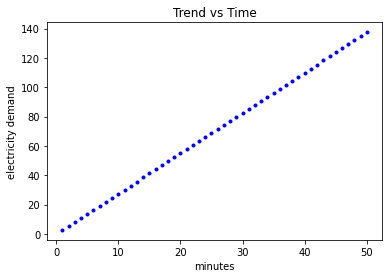

In [ ]:
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

## Seasonal

In [ ]:
# a simple seasonal component with the sine function with a peroid of 6
# np.sin has a peroid of 2pi so we must must multiply by 2pi/6 to get peroid 6.
seasonal = 10 + np.sin(time*(2*np.pi)/6) * 10

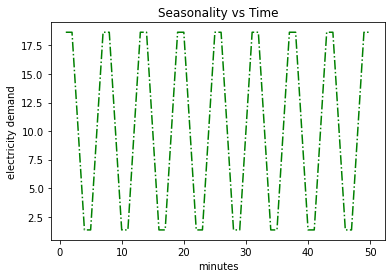

In [ ]:
plt.plot(time, seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

## Residual

In [ ]:
# The residual is usually random noise that cannot be reliably predict.
# Ideally, we would like the nature of the noise to stay the same in order to
# perform time series analysis
np.random.seed(10)  # set the random seed to get reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

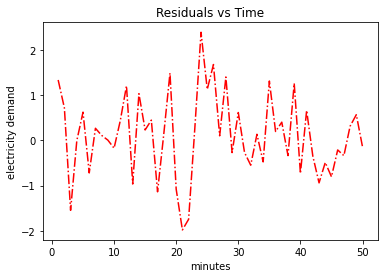

In [ ]:
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

---
# Section 2: Aggregating Trend, Seasonality, and Residual Components

In this section,we will show how to create simple time series data by aggregating Trend, Seasonality, and Residual Components.

### Additive Time Series
$O_{t} = T_{t} + S_{t} + R_{t}$ 

$O_{t}$ is the output   
$T_{t}$ is the trend  
$S_{t}$ is the seasonality  
$R_{t}$ is the residual  
$t$ is a variable representing a particular point in time 

In [ ]:
additive = trend + seasonal + residual

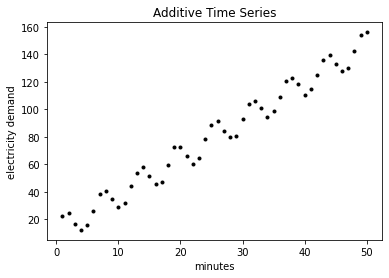

In [ ]:
plt.plot(time, additive, 'k.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

### Multiplicative Time Series

$O_{t} = T_{t} * S_{t} * R_{t}$ 


$O_{t}$ is the output   
$T_{t}$ is the trend  
$S_{t}$ is the seasonality  
$R_{t}$ is the residual  
$_t$ is a variable representing a particular point in time 

In [ ]:
# ignoring residual to make pattern more apparent
ignored_residual = np.ones_like(residual)
multiplicative = trend * seasonal * ignored_residual

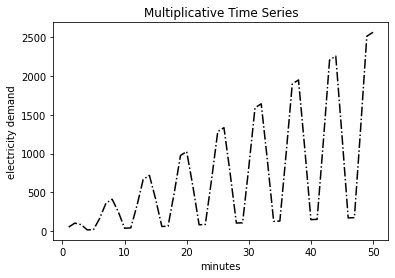

In [ ]:
plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

---
# Section 3: Time Series Decomposition

In this section, we will show how to use python code to decompose time series data by using the **statsmodels** library

## seasonal_decompose function

x = Time series

model = Type of decomposition
(“additive”, “multiplicative”)

period = Period of the series

link "seasonal_decompose"
https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

## Additive Decomposition




In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ss_decomposition = seasonal_decompose(x=additive, model='additive', period=8)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

## Additive Plots

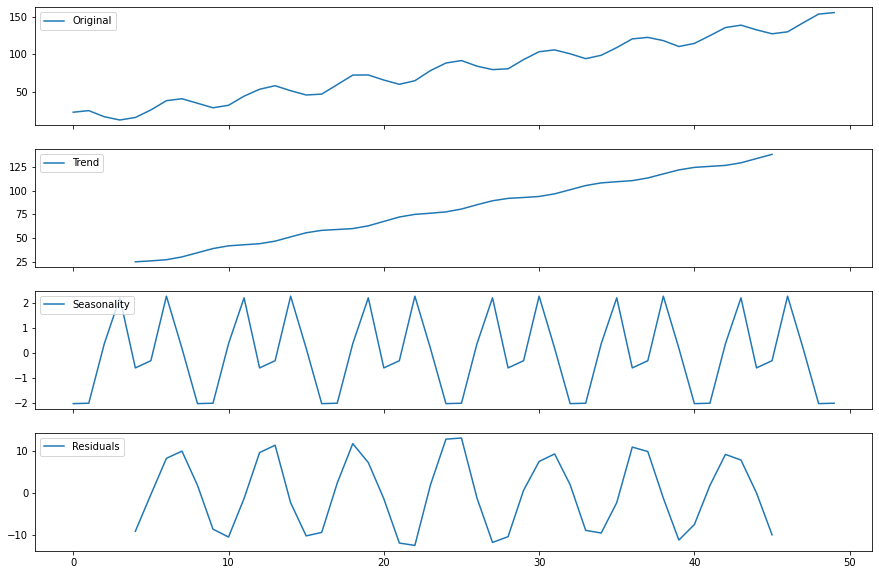

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

## Multiplicative Decomposition

In [ ]:
ss_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

## Multiplicative Plots

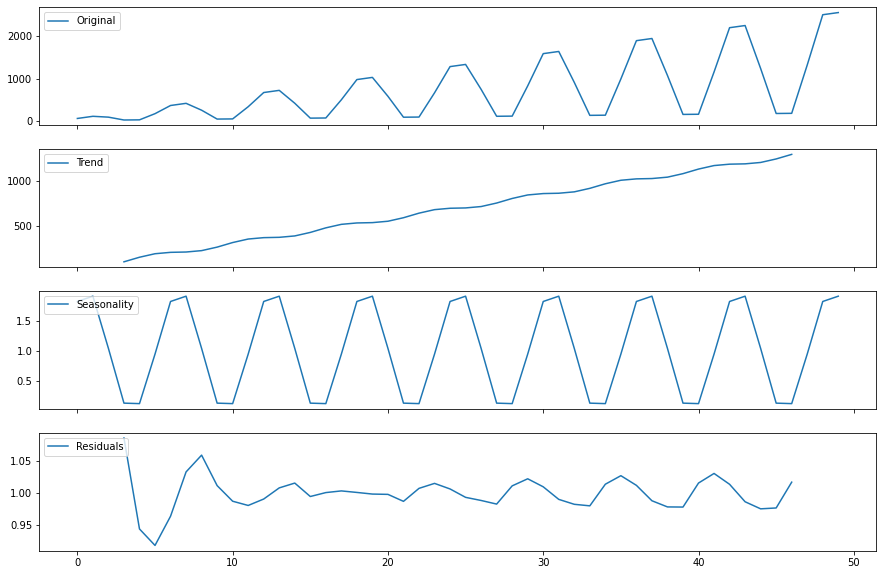

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

---


# Section 4: testing with real data

In this section,we will use **statsmodels** library air passengers data from https://www.kaggle.com/rakannimer/air-passengers

## Data Description

1. Month: Date in format yyyy/mm

2. #Passengers: number of passenger


In [ ]:
!wget https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/AirPassengers.csv

--2021-07-17 11:01:48--  https://raw.githubusercontent.com/Pataweepr/scb_TS_course/master/AirPassengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [text/plain]
Saving to: ‘AirPassengers.csv.2’

AirPassengers.csv.2 100%[===================>]   1.71K  --.-KB/s    in 0s      

2021-07-17 11:01:48 (34.1 MB/s) - ‘AirPassengers.csv.2’ saved [1746/1746]



In [ ]:
!head AirPassengers.csv

Month,#Passengers
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136


## load data with pandas

In [ ]:
path = "AirPassengers.csv" #For local
dataset = pd.read_csv(path)
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = dataset.set_index(['Month'])

dataset.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Text(0.5, 1.0, '1st Time Series Dataset')

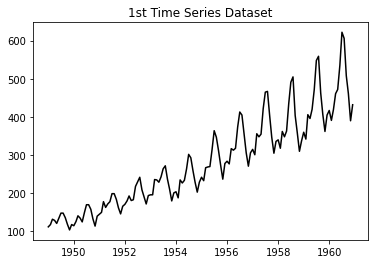

In [ ]:
time = np.array(dataset['Month'],dtype='datetime64[M]')
Passengers = np.array(dataset['#Passengers'])
plt.plot(time, Passengers, 'k-')
plt.title("1st Time Series Dataset")

#### Additive or Multiplicative?

**ANS:**

#### Frequency of Seasonal Component?

**ANS:**

## Solution

This seems to be a multiplicative series since the variance seems to increases as the trend increases.

To get the period, besides domain knowledge, we can use the autocorrelation plot or partial autocorrelation plot which we will learn about later in the course.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

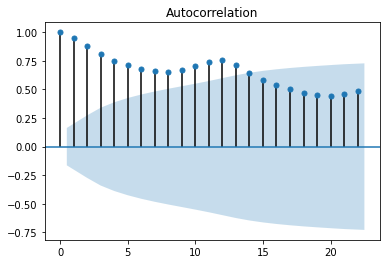

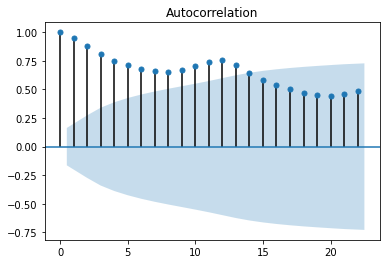

In [ ]:
plot_acf(Passengers)

In [ ]:
ss_decomposition_multi = seasonal_decompose(x=Passengers, 
                                             model='multiplicative', 
                                             period=12)

estimated_trend_multi = ss_decomposition_multi.trend
estimated_seasonal_multi = ss_decomposition_multi.seasonal
estimated_residual_multi = ss_decomposition_multi.resid

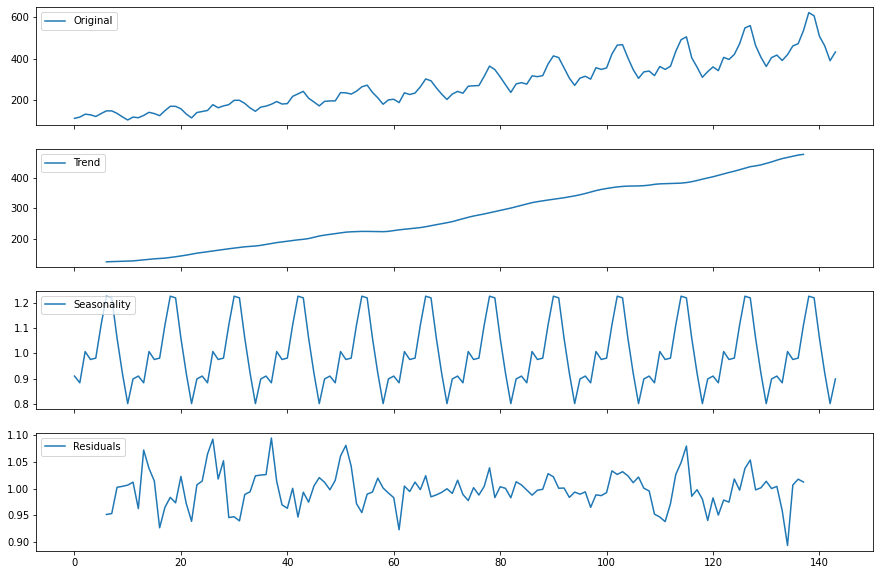

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(Passengers, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend_multi, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal_multi, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual_multi, label='Residuals')
axes[3].legend(loc='upper left');